In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [33]:
path = 'startup_funding.csv'

In [34]:
df = pd.read_csv(path)

### Question

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [35]:
test5 = df.copy()

In [36]:
#correcting the spelling in investors name as ignoring the undisclosed investors
test5['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test5['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

In [37]:
#correcting major startup names
test5['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test5['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test5['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test5['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Olacabs", "Ola", inplace = True)
test5['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test5['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [38]:
#correcting spelling of investment type
test5['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test5['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test5['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

In [39]:
#filter na 
test5.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test5.reset_index(inplace = True, drop = True)

In [40]:
#function to create dictionary of investor name making investment to different startups and Investment type is either Seed funding or Crowd funding
def Create(startup_name, Investor_name, Invest_type, Investment_type):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        type_of_invest = Invest_type[idx].strip()
        if type_of_invest not in Investment_type: #if investement type is either seed or crowd then we will look into the startup name or investors name
            continue
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None:    #no startup is still funded by this investor till now
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]   
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:    #no startup is still funded by this investor till now
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:            #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt

In [41]:
#making dictionary to keep record of every investor
dictionary = Create(test5['StartupName'], test5['InvestorsName'], test5['InvestmentType'], ["Private Equity"])

In [42]:
#build pandas dataframe
diff_invest_type = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

In [43]:
#sort in descending order on the basis of values
diff_invest_type = diff_invest_type.sort_values(by = [0], ascending = False)

In [44]:
x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(diff_invest_type.index[i])
    y.append(diff_invest_type.values[i][0])

In [45]:
#printing the top investors who invested who invested most number of times in different startups and Investment type is Private Equity
print("List Of Top 5 Investors who Invested most number of times of type Private Equity:")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Private Equity:
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Blume Ventures
5. SAIF Partners


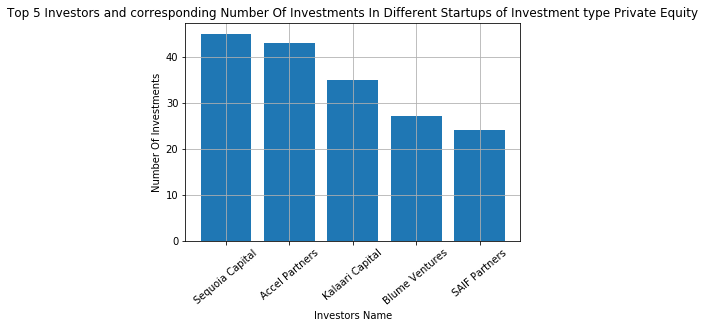

Name Of Investors  Total Number Of Investments of type Private Equity
0   Sequoia Capital                                                 45 
1    Accel Partners                                                 43 
2   Kalaari Capital                                                 35 
3    Blume Ventures                                                 27 
4     SAIF Partners                                                 24

In [46]:
#plot
plt.bar(x, y)
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Private Equity")
plt.show()

#pandas frame for Investors name and corresponding Number of Investments made by them in different startups and Investment type is either Seed funding or Crowd funding
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Private Equity"])
investor_data